# Heart Disease Data Set

## Data Set Information:

    This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

## Columns:

        1. Age - Patient Age
        2. Sex - Patient Gender
        3. cp - Constrictive Pericarditis
        4. trestbps - Resting Blood Pressure
        5. chol - Cholestoral
        6. fbs - Fasting Blood Sugar
        7. restecg - Resting ElectroCardiography
        8. thalach - Maximum Heart Rate Achieved
        9. exang - Exercise Induced Angina
        10. oldpeak - Exercise Relative To Rest
        11. slope - ST Segment/Heart Rate Slope
        12. ca - Calcium Supplements
        13. thal - Thalassemia
        14. HD(Heart Disease) - 0 (no presence), [1 2 3 4](presence)    

In [1]:
cols=['Age','sex','cp','trestbps','chol','fbs','restecg',
      'thalach','exang','oldpeak','slope','ca','thal','HD']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heartdisease_data.csv',header=0,names=cols,na_values='?')
df

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HD
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
195,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
196,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
197,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df.shape

(199, 14)

In [5]:
df.columns

Index(['Age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'HD'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       199 non-null    int64  
 1   sex       199 non-null    int64  
 2   cp        199 non-null    int64  
 3   trestbps  143 non-null    float64
 4   chol      192 non-null    float64
 5   fbs       192 non-null    float64
 6   restecg   199 non-null    int64  
 7   thalach   146 non-null    float64
 8   exang     146 non-null    float64
 9   oldpeak   143 non-null    float64
 10  slope     97 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  HD        199 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.9 KB


    Observations:   
        All columns is of int and float Data-types.

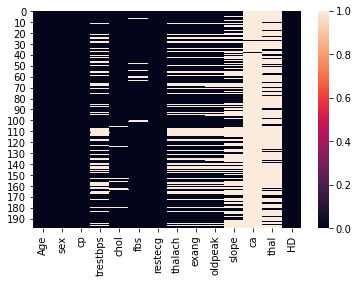

In [7]:
sns.heatmap(df.isnull())
plt.show()

    Observations:
        Dataset contains missing values.

## Handling the NaN values.

In [8]:
df.isnull().sum()

Age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          197
thal        165
HD            0
dtype: int64

### Observations:
        1. Columns such as 'ca' and 'thal' has missing values above 80% and 95% respectively.
        2. Hence drop these columns.

In [9]:
df.drop(['ca','thal'],axis=1,inplace=True)

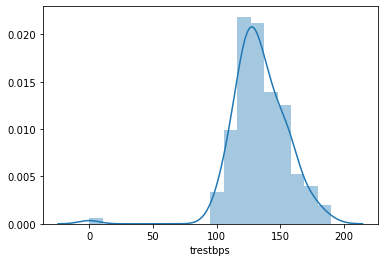

In [10]:
sns.distplot(df['trestbps'])
plt.show()

### Observations:
        Data is somewhat normally distributed, hence fill the NaN values with 'Mean'.

In [11]:
df['trestbps'].fillna(df['trestbps'].mean(),inplace=True)

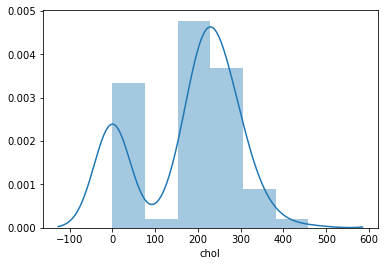

In [12]:
sns.distplot(df['chol'])
plt.show()

### Observations:
        Data is not normally distributed, hence fill the NaN values with 'Median'.

In [13]:
df['chol'].fillna(df['chol'].median(),inplace=True)

In [14]:
df['fbs'].unique()

array([ 0.,  1., nan])

### Observations:
        Since 'fbs' column has Discrete values (i.e 0 and 1), hence fill the NaN values with most frequently repeated value(Mode value).

In [15]:
df['fbs'].fillna(df['fbs'].mode().values[0],inplace=True)

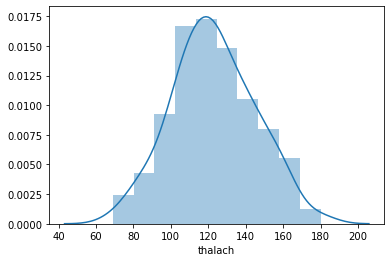

In [16]:
sns.distplot(df['thalach'])
plt.show()

### Observations:
        Data is normally distributed, hence fill the NaN values with 'Mean'.

In [17]:
df['thalach'].fillna(df['thalach'].mean(),inplace=True)

In [18]:
df['exang'].unique()

array([ 0.,  1., nan])

### Observations:
        Since 'exang' column has Discrete values (i.e 0 and 1), hence fill the NaN values with most frequently repeated value(Mode value).

In [19]:
df['exang'].fillna(df['exang'].mode().values[0],inplace=True)

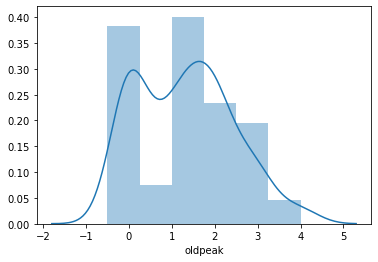

In [20]:
sns.distplot(df['oldpeak'])
plt.show()

### Observations:
        Data is not normally distributed, hence fill the NaN values with 'Median'.

In [21]:
df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)

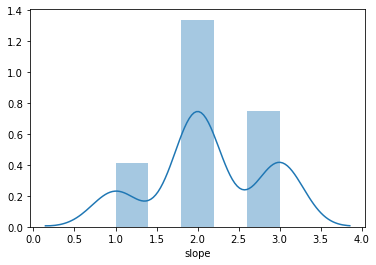

In [22]:
sns.distplot(df['slope'])
plt.show()

### Observations:
        Data is not normally distributed, hence fill the NaN values with 'Median'.

In [23]:
df['slope'].fillna(df['slope'].median(),inplace=True)

In [24]:
df.isnull().sum()

Age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
HD          0
dtype: int64

# EDA

## Univariate Analysis

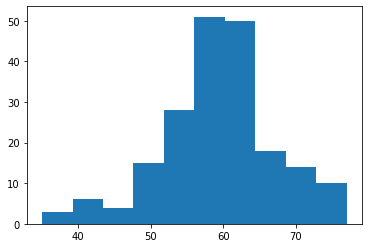

In [25]:
plt.hist(df['Age'])
plt.show()

### Observations:
        Patients age ranges from 35 to 75 years.

In [26]:
df['sex'].unique()

array([1, 0], dtype=int64)

### Observations:
        Let's assume,
            0 - Female
            1 - Male

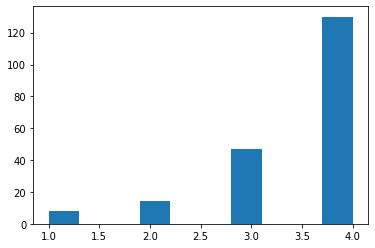

In [27]:
plt.hist(df['cp'])
plt.show()

### Observations:
            cp(Constrictive Pericarditis) ranges from 1 to 4.

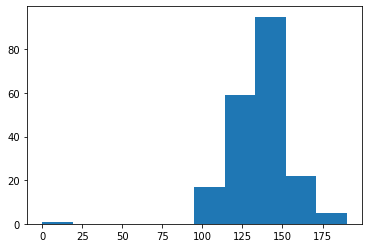

In [28]:
plt.hist(df['trestbps'])
plt.show()

### Observations:
        trestbps ranges from 100 to 180.

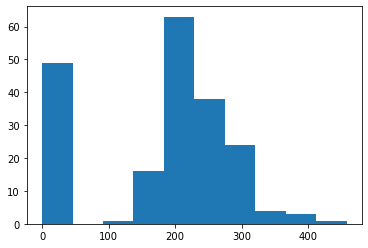

In [29]:
plt.hist(df['chol'])
plt.show()

### Observations:
        chol(Cholestoral) ranges from 100 to 450.

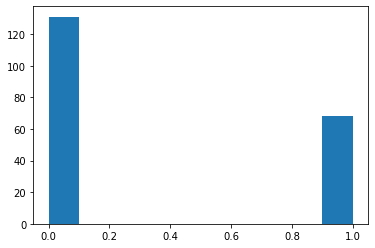

In [30]:
plt.hist(df['fbs'])
plt.show()

### Observations:
        fbs is either 0 or 1.

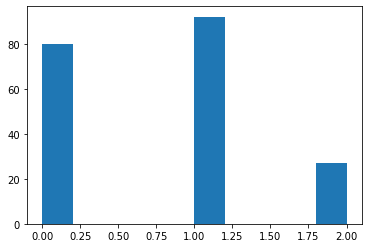

In [31]:
plt.hist(df['restecg'])
plt.show()

### Observations:
        restecg ranges from 0 to 2.

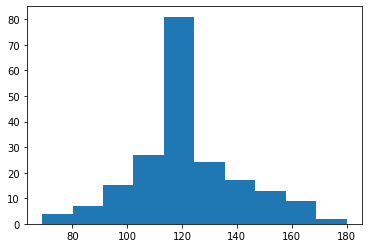

In [32]:
plt.hist(df['thalach'])
plt.show()

### Observations:
        - thalach ranges from 70 to 180.
        - Majority of patients have thalach in b\w 100 to 160.

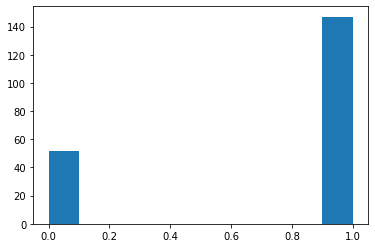

In [33]:
plt.hist(df['exang'])
plt.show()

### Observations:
        exang is either 0 or 1.

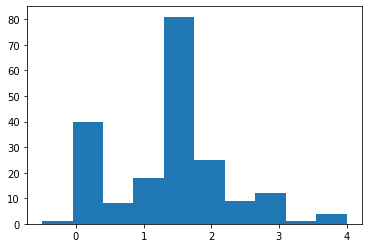

In [34]:
plt.hist(df['oldpeak'])
plt.show()

### Observations:
        oldpeak ranges from 0 to 4.

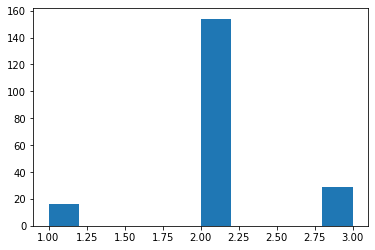

In [35]:
plt.hist(df['slope'])
plt.show()

### Observations:
        slope values ranges from 1 to 3.

In [36]:
# Label Column/Target Variable
df['HD'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### Observations:
        Gives us, whether patients have 'Heart Disease' or not.
            0 - no presence
            [1,2,3,4] - presence

## Bivariate Analysis

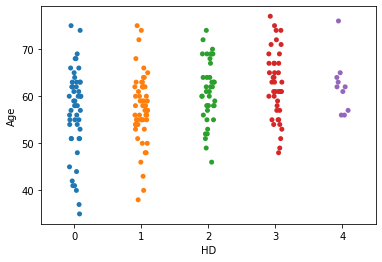

In [37]:
sns.stripplot(df['HD'],df['Age'])
plt.show()

### Observations:
        People above 45 years of age is at higher risk of getting Heart Disease.

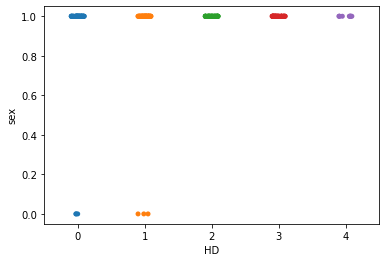

In [38]:
sns.stripplot(df['HD'],df['sex'])
plt.show()

### Observations:
        Females are at low risk of getting Heart Disease.

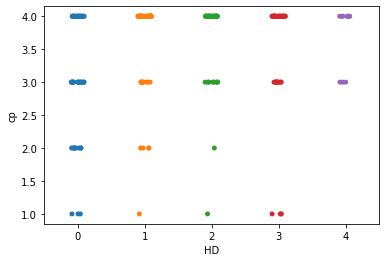

In [39]:
sns.stripplot(df['HD'],df['cp'])
plt.show()

### Observations:
        Patients having cp(Constrictive Pericarditis) value above 3 are at higher risk of getting Heart Disease.

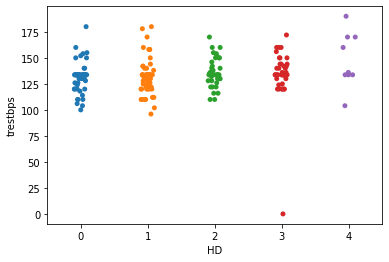

In [40]:
sns.stripplot(df['HD'],df['trestbps'])
plt.show()

### Observations:
        Patients having trestbps value above 115 are at higher risk of getting Heart Disease.

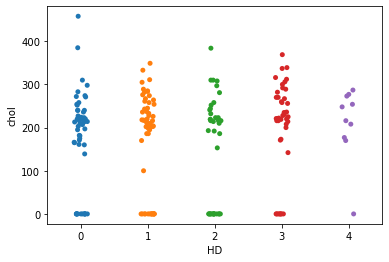

In [41]:
sns.stripplot(df['HD'],df['chol'])
plt.show()

### Observations:
        Patients having chol(Cholestoral) level above 150 are at higher risk of getting Heart Disease.

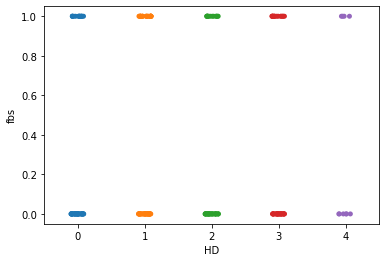

In [42]:
sns.stripplot(df['HD'],df['fbs'])
plt.show()

### Observations:
        Patients having fbs value of 1 are at higher risk of getting Heart Disease.

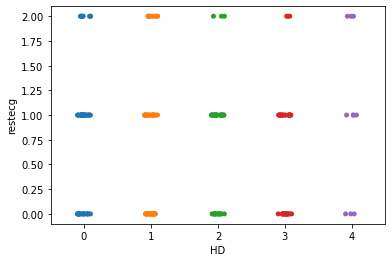

In [43]:
sns.stripplot(df['HD'],df['restecg'])
plt.show()

### Observations:
        Patients having restecg value of 1 at higher risk of getting Heart Disease.

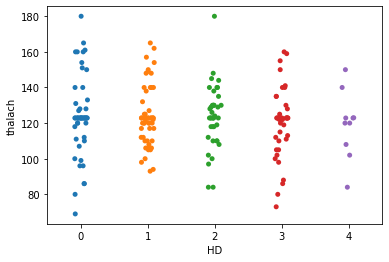

In [44]:
sns.stripplot(df['HD'],df['thalach'])
plt.show()

### Observations:
        Patients having thalach value in the range of 90 to 150 are at higher risk of getting Heart Disease.

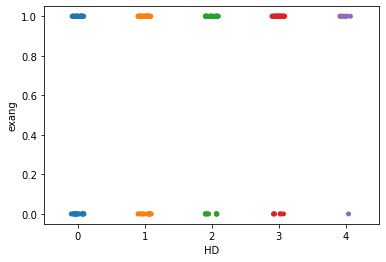

In [45]:
sns.stripplot(df['HD'],df['exang'])
plt.show()

### Observations:
        Patients having exang value of 1 are at higher risk of getting Heart Disease.

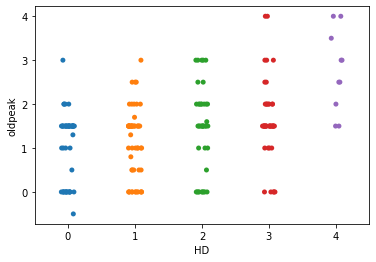

In [46]:
sns.stripplot(df['HD'],df['oldpeak'])
plt.show()

### Observations:
        -Patients having oldpeak value in the range of 1 to 3 are at higher risk of getting Heart Disease.
        -Patients having oldpeak value of 4 have Heart Disease.

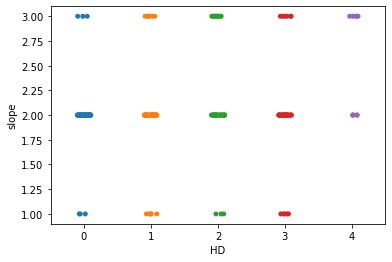

In [47]:
sns.stripplot(df['HD'],df['slope'])
plt.show()

### Observations:
        Patients having slope value of 2/3 are at higher risk of getting Heart Disease.

## Correlation Matrix

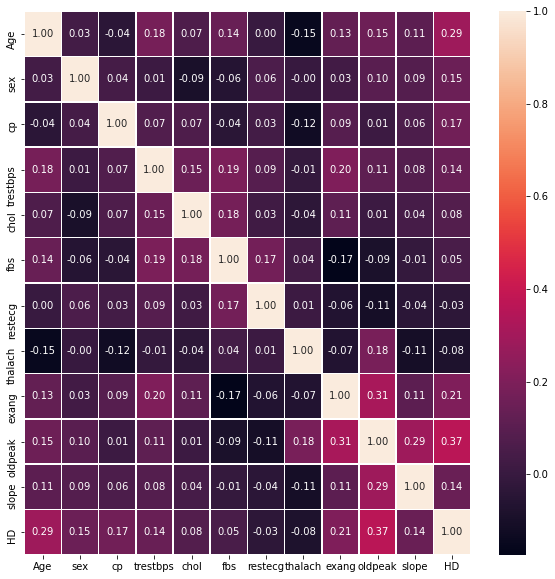

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=0.5)
plt.show()

### Observations:
        - OldPeak has 38% positive correlation with target column which is a good correleation.
        - Age has 30% positive correlation with target column which is a good correleation.

## Checking Outliers

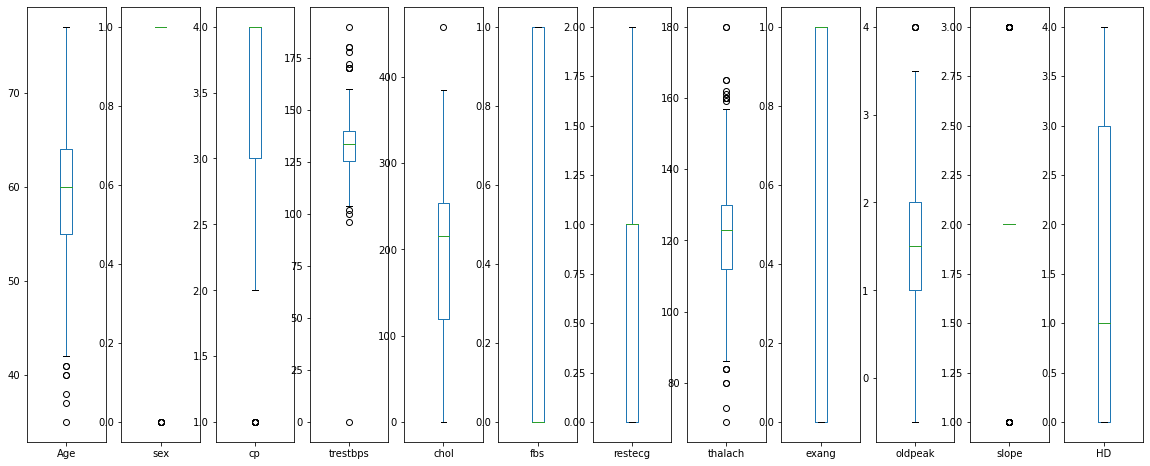

In [49]:
df.plot(kind='box',subplots=True,figsize=(20,8))
plt.show()

### Observations:
        From above boxplots it is evident that outliers exists.

# Data Preprocessing

## Removing Outliers

### 1. Z-score Method

In [50]:
from scipy.stats import zscore

z=np.abs(zscore(df))

In [51]:
np.where(z>3)

(array([ 23,  32,  50,  65,  69,  71,  75,  78,  95,  96, 125, 127, 130,
        132, 136, 175, 189, 194, 195], dtype=int64),
 array([7, 3, 1, 2, 7, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2],
       dtype=int64))

In [52]:
# Threshold=3
hd = df[(z<3).all(axis=1)]

In [53]:
print(df.shape)
print(hd.shape)

(199, 12)
(180, 12)


In [54]:
# percentage loss of data
per_loss=((199-180)/199)*100
per_loss

9.547738693467336

    Since significant amount (above 5%) of data is lost, hence we are not going with Z-score method of removing outliers.

## Checking Skewness

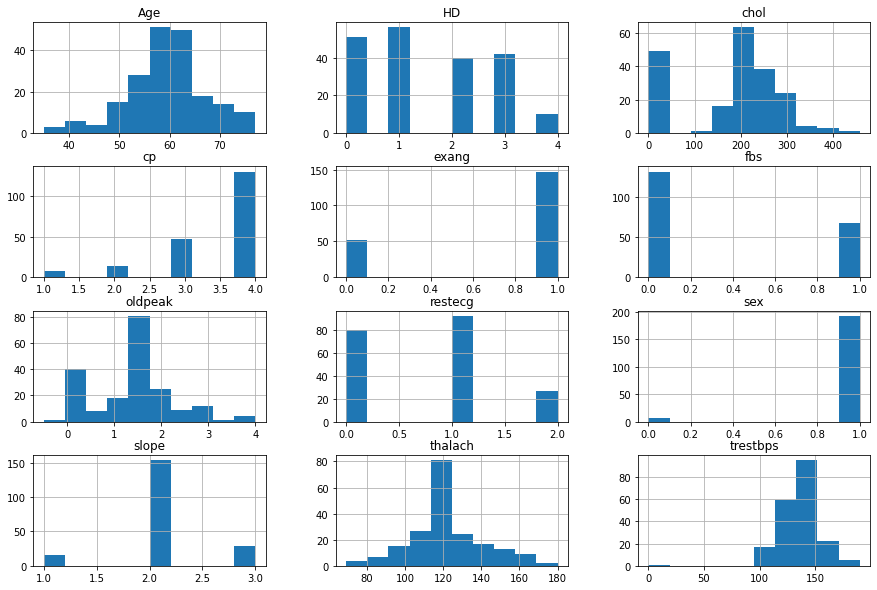

In [55]:
df.hist(figsize=(15,10))
plt.show()

### Observations:
    From above plots it is clear that skewness exists.

In [56]:
df.skew()

Age        -0.397178
sex        -5.537073
cp         -1.641267
trestbps   -1.501953
chol       -0.594419
fbs         0.672579
restecg     0.396540
thalach     0.137597
exang      -1.094854
oldpeak     0.264024
slope       0.207950
HD          0.302681
dtype: float64

### Observations:
        Acceptable range of skewness is +\- 0.5, hence data is skewed.

## Splitting Data

In [57]:
x=df.drop('HD',axis=1)
y=df['HD']

## Removing Skewness

In [58]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

## Standardizing Data

In [59]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# Model Training And Testing

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [61]:
# finding the best random_state

acc=0
for i in range(40,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    if mod_acc>acc:
        acc=mod_acc
        best_random_state=i
        
print(f" Best Accuracy score is {acc*100} which is found on {best_random_state}")

 Best Accuracy score is 52.0 which is found on 468


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=best_random_state)

In [63]:
# finding the best cv

cv=0
for i in range(2,20):
    cv_score=cross_val_score(mod,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best Cross_val_score is {cv*100} which is found on {best_cv}")

 Best Cross_val_score is 35.6951871657754 which is found on 17


# Finding The Best Model

In [64]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

In [65]:
mod_list=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),
         AdaBoostClassifier(),GradientBoostingClassifier(),SGDClassifier()]

In [66]:
for i in mod_list:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    print('Accuracy_score:',mod_acc*100)
    cv_score=cross_val_score(i,x,y,cv=best_cv).mean()
    print('Cross_val_score:',cv_score*100)
    print('Difference b\w Accuracy score and Cross_val_score is',(mod_acc*100)-(cv_score*100))
    print('Training score:',i.score(x_train,y_train)*100)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('\n')

DecisionTreeClassifier()
Accuracy_score: 52.0
Cross_val_score: 33.73440285204991
Difference b\w Accuracy score and Cross_val_score is 18.26559714795009
Training score: 100.0
[[9 1 1 0 0]
 [3 8 3 1 0]
 [0 3 6 2 0]
 [2 2 3 3 2]
 [0 1 0 0 0]]
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.53      0.53      0.53        15
           2       0.46      0.55      0.50        11
           3       0.50      0.25      0.33        12
           4       0.00      0.00      0.00         1

    accuracy                           0.52        50
   macro avg       0.43      0.43      0.42        50
weighted avg       0.52      0.52      0.51        50



SVC()
Accuracy_score: 36.0
Cross_val_score: 39.17112299465241
Difference b\w Accuracy score and Cross_val_score is -3.171122994652407
Training score: 69.12751677852349
[[7 3 1 0 0]
 [3 8 3 1 0]
 [2 4 0 5 0]
 [2 5 2 3 0]
 [0 1 0 0 0]]
              precision    recall  

### Observations:

        Decision Tree Classifier:-
            Accuracy_score: 52.0
            Training score: 100.0
                
Clearly we can see that model is overfitting.
### Reason
    We got less data (200 Rows).

### Let's consider Target Column

In [67]:
df['HD'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### Observations:
    Here,
        0 - No presence (Heart Disease)
        [1,2,3,4] - Presence (Heart Disease)
        
###    Let's convert [1,2,3,4] Presence into 1 [Presence].

In [68]:
df['HD']=df['HD'].replace([2,3,4],1)

In [69]:
df['HD'].unique()

array([0, 1], dtype=int64)

### Observations:
        Here,
            0 - No presence (Heart Disease)
            1 - Presence (Heart Disease)

### New y

In [70]:
y=df['HD']
y

0      0
1      1
2      1
3      0
4      0
      ..
194    1
195    0
196    1
197    0
198    1
Name: HD, Length: 199, dtype: int64

In [71]:
# finding the best random_state

acc=0
for i in range(40,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    if mod_acc>acc:
        acc=mod_acc
        best_random_state=i
        
print(f" Best Accuracy score is {acc*100} which is found on {best_random_state}")

 Best Accuracy score is 84.0 which is found on 293


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=best_random_state)

In [73]:
# finding the best cv

cv=0
for i in range(2,20):
    cv_score=cross_val_score(mod,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best Cross_val_score is {cv*100} which is found on {best_cv}")

 Best Cross_val_score is 71.35531135531136 which is found on 15


In [74]:
for i in mod_list:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    print('Accuracy_score:',mod_acc*100)
    cv_score=cross_val_score(i,x,y,cv=best_cv).mean()
    print('Cross_val_score:',cv_score*100)
    print('Difference b\w Accuracy score and Cross_val_score is',(mod_acc*100)-(cv_score*100))
    print('Training score:',i.score(x_train,y_train)*100)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('\n')

DecisionTreeClassifier()
Accuracy_score: 84.0
Cross_val_score: 70.25641025641025
Difference b\w Accuracy score and Cross_val_score is 13.743589743589752
Training score: 100.0
[[ 7  4]
 [ 4 35]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.90      0.90      0.90        39

    accuracy                           0.84        50
   macro avg       0.77      0.77      0.77        50
weighted avg       0.84      0.84      0.84        50



SVC()
Accuracy_score: 82.0
Cross_val_score: 77.3992673992674
Difference b\w Accuracy score and Cross_val_score is 4.600732600732599
Training score: 79.86577181208054
[[ 3  8]
 [ 1 38]]
              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.83      0.97      0.89        39

    accuracy                           0.82        50
   macro avg       0.79      0.62      0.65        50
weighted avg       0

### Observations:
        From above it is clear that K Neighbors Classifier and Random Forest Classifier is performing better.

In [75]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy_score:',mod_acc*100)
cv_score=cross_val_score(rfc,x,y,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference b\w Accuracy score and Cross_val_score is',(mod_acc*100)-(cv_score*100))
print('Training score:',rfc.score(x_train,y_train)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy_score: 90.0
Cross_val_score: 74.39560439560441
Difference b\w Accuracy score and Cross_val_score is 15.604395604395592
Training score: 100.0
[[ 7  4]
 [ 1 38]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.90      0.97      0.94        39

    accuracy                           0.90        50
   macro avg       0.89      0.81      0.84        50
weighted avg       0.90      0.90      0.89        50



### Let's select Random Forest Classifier for hyper-parameter tuning, because it has accuracy score of 90%.

## Hyper-parameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators':[100,150],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2']
}

In [77]:
gscv=GridSearchCV(rfc,parameters,scoring='accuracy',cv=best_cv)
gscv.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

In [78]:
gscv.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}

In [79]:
rfc_gs=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='log2')
rfc_gs.fit(x_train,y_train)
y_pred=rfc_gs.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy_score:',mod_acc*100)
cv_score=cross_val_score(rfc_gs,x,y,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference b\w Accuracy score and Cross_val_score is',(mod_acc*100)-(cv_score*100))
print('Training score:',rfc_gs.score(x_train,y_train)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy_score: 86.0
Cross_val_score: 73.91941391941394
Difference b\w Accuracy score and Cross_val_score is 12.080586080586059
Training score: 100.0
[[ 6  5]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.88      0.95      0.91        39

    accuracy                           0.86        50
   macro avg       0.82      0.75      0.77        50
weighted avg       0.85      0.86      0.85        50



## Roc_Curve

In [80]:
from sklearn.metrics import roc_curve

In [81]:
y_pred_proba=rfc.predict_proba(x_test)[:,1]

In [82]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)

Text(0.5, 1.0, 'Decision Tree Classifier')

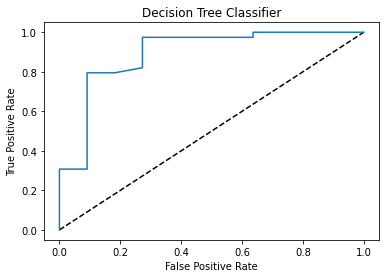

In [83]:
plt.plot([0,1],[0,1],'--k')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')

## Roc_Auc Score

In [84]:
from sklearn.metrics import roc_auc_score

In [85]:
roc_auc_score(y_test,y_pred)*100

74.70862470862471

# Conclusion

In [86]:
df1=pd.DataFrame({'Actual Result':y_test,'Predicted Result':y_pred})
df1

,Actual Result,Predicted Result
152,1,1
37,1,1
178,1,1
87,1,1
69,0,0
72,1,1
88,1,1
182,1,1
186,1,1
2,1,1


### From above it clear that model (Random Forest Classifier) is performing better.

In [87]:
import joblib

In [88]:
joblib.dump(y_pred,'Predicted Result')

['Predicted Result']

In [89]:
# saving the best model for production
joblib.dump(rfc,'Heart-Disease Model.obj')

['Heart-Disease Model.obj']